In [12]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import nltk 
import pickle
import sklearn.metrics
# import gensim # representing documents as semantic vectors
from sklearn.metrics import *

from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
# Load the classifier from the file
with open('../../../Training/ML-Based Approach/naive_bayes_with_stopwords_classifier.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

In [18]:
df_test_naive_bayes_with_stopwords = pd.read_csv('../../../Data-Preparation/Twitter-Corpus/full_corpus_preprocessed.csv')

In [19]:
df_test_naive_bayes_with_stopwords.head()

,target,Text
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced)
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple


In [ ]:
def extract_features(text):
    words = word_tokenize(text)
    features = {word.lower(): True for word in words if word.isalpha()}
    return features


In [ ]:
df_test_naive_bayes_with_stopwords['features'] = df_test_naive_bayes_with_stopwords['text'].apply(lambda text: extract_features(str(text)))

In [ ]:
df_test_naive_bayes_with_stopwords.head()

,createdAt,id,text,features
0,Mon Jun 10 15:56:32 +0000 2024,1800195352974258322,Here's What the iPhone 16 Needs From iOS 18 to Be Truly Great https://t.co/DHXu9nWSkk,"{'here': True, 'what': True, 'the': True, 'iphone': True, 'needs': True, 'from': True, 'ios': True, 'to': True, 'be': True, 'truly': True, 'great': True, 'https': True}"
1,Mon Jun 10 15:56:32 +0000 2024,1800195349971165343,Here's What the iPhone 16 Needs From iOS 18 to Be Truly Great - CNET https://t.co/tVFXmLlehE,"{'here': True, 'what': True, 'the': True, 'iphone': True, 'needs': True, 'from': True, 'ios': True, 'to': True, 'be': True, 'truly': True, 'great': True, 'cnet': True, 'https': True}"
2,Mon Jun 10 15:51:04 +0000 2024,1800193974055084496,Imagine if they are iPhone 16+ only.\n#AI #AppleEvent #WWDC24,"{'imagine': True, 'if': True, 'they': True, 'are': True, 'iphone': True, 'only': True, 'ai': True, 'appleevent': True}"
3,Mon Jun 10 15:42:50 +0000 2024,1800191905508298819,@_sakanachandesu @ItsHassooonnn i wish u the best luck!! i haven’t downloaded a dev beta since the ios 16 dev beta bricked my iphone 13 in 2022,"{'itshassooonnn': True, 'i': True, 'wish': True, 'u': True, 'the': True, 'best': True, 'luck': True, 'haven': True, 't': True, 'downloaded': True, 'a': True, 'dev': True, 'beta': True, 'since': True, 'ios': True, 'bricked': True, 'my': True, 'iphone': True, 'in': True}"
4,Mon Jun 10 15:40:47 +0000 2024,1800191387109060889,@TekOpinions Incredible Apple has gotten away by giving us the same old software for 16 years let's hope they do wow us with iOS 18. If it's that good I might be going back to having an iPhone.,"{'tekopinions': True, 'incredible': True, 'apple': True, 'has': True, 'gotten': True, 'away': True, 'by': True, 'giving': True, 'us': True, 'the': True, 'same': True, 'old': True, 'software': True, 'for': True, 'years': True, 'let': True, 'hope': True, 'they': True, 'do': True, 'wow': True, 'with': True, 'ios': True, 'if': True, 'it': True, 'that': True, 'good': True, 'i': True, 'might': True, 'be': True, 'going': True, 'back': True, 'to': True, 'having': True, 'an': True, 'iphone': True}"


In [ ]:

df_test_naive_bayes_with_stopwords['Prediction'] = df_test_naive_bayes_with_stopwords['features'].apply(classifier.classify)

In [ ]:
df_test_naive_bayes_with_stopwords

,createdAt,id,text,features,Prediction
0,Mon Jun 10 15:56:32 +0000 2024,1800195352974258322,Here's What the iPhone 16 Needs From iOS 18 to Be Truly Great https://t.co/DHXu9nWSkk,"{'here': True, 'what': True, 'the': True, 'iphone': True, 'needs': True, 'from': True, 'ios': True, 'to': True, 'be': True, 'truly': True, 'great': True, 'https': True}",negative
1,Mon Jun 10 15:56:32 +0000 2024,1800195349971165343,Here's What the iPhone 16 Needs From iOS 18 to Be Truly Great - CNET https://t.co/tVFXmLlehE,"{'here': True, 'what': True, 'the': True, 'iphone': True, 'needs': True, 'from': True, 'ios': True, 'to': True, 'be': True, 'truly': True, 'great': True, 'cnet': True, 'https': True}",negative
2,Mon Jun 10 15:51:04 +0000 2024,1800193974055084496,Imagine if they are iPhone 16+ only.\n#AI #AppleEvent #WWDC24,"{'imagine': True, 'if': True, 'they': True, 'are': True, 'iphone': True, 'only': True, 'ai': True, 'appleevent': True}",negative
3,Mon Jun 10 15:42:50 +0000 2024,1800191905508298819,@_sakanachandesu @ItsHassooonnn i wish u the best luck!! i haven’t downloaded a dev beta since the ios 16 dev beta bricked my iphone 13 in 2022,"{'itshassooonnn': True, 'i': True, 'wish': True, 'u': True, 'the': True, 'best': True, 'luck': True, 'haven': True, 't': True, 'downloaded': True, 'a': True, 'dev': True, 'beta': True, 'since': True, 'ios': True, 'bricked': True, 'my': True, 'iphone': True, 'in': True}",negative
4,Mon Jun 10 15:40:47 +0000 2024,1800191387109060889,@TekOpinions Incredible Apple has gotten away by giving us the same old software for 16 years let's hope they do wow us with iOS 18. If it's that good I might be going back to having an iPhone.,"{'tekopinions': True, 'incredible': True, 'apple': True, 'has': True, 'gotten': True, 'away': True, 'by': True, 'giving': True, 'us': True, 'the': True, 'same': True, 'old': True, 'software': True, 'for': True, 'years': True, 'let': True, 'hope': True, 'they': True, 'do': True, 'wow': True, 'with': True, 'ios': True, 'if': True, 'it': True, 'that': True, 'good': True, 'i': True, 'might': True, 'be': True, 'going': True, 'back': True, 'to': True, 'having': True, 'an': True, 'iphone': True}",negative
...,...,...,...,...,...
95,Mon Jun 10 06:36:16 +0000 2024,1800054354155585913,"🚀 Apple is set to unveil iOS 18 at WWDC on June 10! \n\nGet ready for ""Apple Intelligence"" AI features, but only for iPhone 15 Pro, iPhone 16, and M1 devices. \n\nExpect content summarisation, enhanced Siri, AI-created emojis, and more! Launching this fall. \n\nStay tuned! 📱✨ #AppleEvent #iOS18 #WWDC2024","{'apple': True, 'is': True, 'set': True, 'to': True, 'unveil': True, 'ios': True, 'at': True, 'wwdc': True, 'on': True, 'june': True, 'get': True, 'ready': True, 'for': True, 'intelligence': True, 'ai': True, 'features': True, 'but': True, 'only': True, 'iphone': True, 'pro': True, 'and': True, 'devices': True, 'expect': True, 'content': True, 'summarisation': True, 'enhanced': True, 'siri': True, 'emojis': True, 'more': True, 'launching': True, 'this': True, 'fall': True, 'stay': True, 'tuned': True, 'appleevent': True}",positive
96,Mon Jun 10 06:33:06 +0000 2024,1800053559523991848,iPhone 16 Pro might have 5x optical zoom and 25x digital zoom. What's more? Watch in our reel. \n\n#camera #iphone16 #iphonephotography #leaks https://t.co/4bfqTOx2vZ,"{'iphone': True, 'pro': True, 'might': True, 'have': True, 'optical': True, 'zoom': True, 'and': True, 'digital': True, 'what': True, 'more': True, 'watch': True, 'in': True, 'our': True, 'reel': True, 'camera': True, 'iphonephotography': True, 'leaks': True, 'https': True}",negative
97,Mon Jun 10 06:15:27 +0000 2024,1800049119085682720,"@heya_stuff If possible,can you do this kind of colorful concept for the iPhone 16!? Felt that it would be crazy😃","{'if': True, 'possible': True, 'can': True, 'you': True, 'do': True, 'this': True, 'kind': True, 'of': True, 'colorful': True, 'concept': True, 'for': True, 'the': True, 'iphone': True, 'felt': True, 'that': True, 'it': Tru

In [ ]:
df_test_naive_bayes_with_stopwords['Prediction'].value_counts()

Prediction
negative    84
positive    16
Name: count, dtype: int64

In [ ]:
df_test_naive_bayes_with_stopwords.to_csv('twitter_labelled.csv', index=False)

In [ ]:
# Berechnung der Metriken
accuracy = accuracy_score(df_test_naive_bayes_with_stopwords['features'], df_test_naive_bayes_with_stopwords['Prediction'])
precision = precision_score(df_test_naive_bayes_with_stopwords['features'], df_test_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
recall = recall_score(df_test_naive_bayes_with_stopwords['features'], df_test_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
f1 = f1_score(df_test_naive_bayes_with_stopwords['features'], df_test_naive_bayes_with_stopwords['Prediction'], pos_label='positive')

KeyError: 'Ground_Truth_Label'

In [ ]:
# Ausgabe der Metriken
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.77
Precision: 0.84
Recall: 0.65
F1 Score: 0.74


In [ ]:
# Vollständiger Bericht
print("\nClassification Report:\n")
print(classification_report(df_test_naive_bayes_with_stopwords['features'], df_test_naive_bayes_with_stopwords['Prediction'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.72      0.88      0.79    160000
    positive       0.84      0.65      0.74    160000

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.76    320000
weighted avg       0.78      0.77      0.76    320000



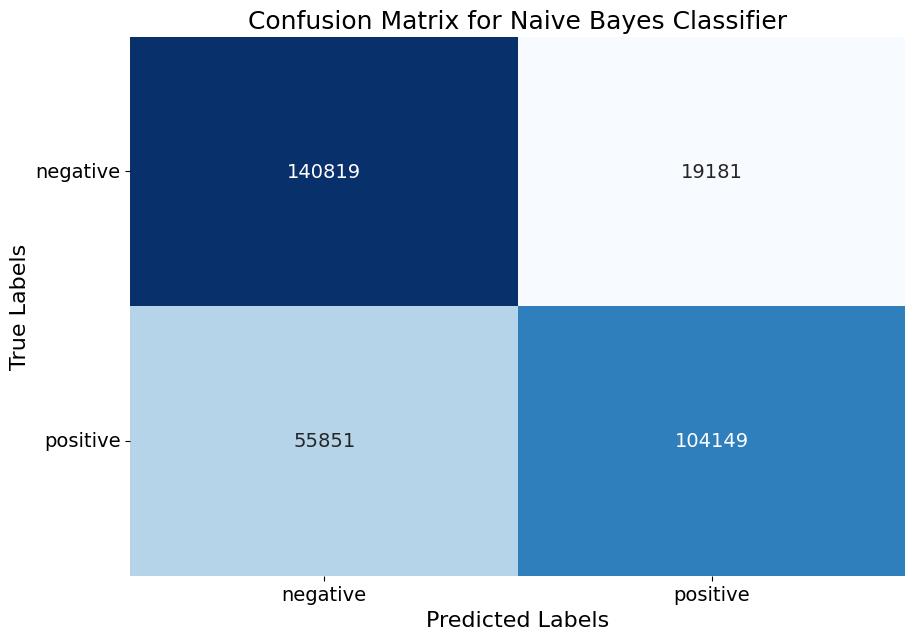

In [ ]:
cm_nb = confusion_matrix(df_test_naive_bayes_with_stopwords['features'], df_test_naive_bayes_with_stopwords['Prediction'])


# Erstellen der Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()